# Limpieza de Datos de visitas19

### Librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Lectura del archivo visitas.csv

In [2]:
dataframe_general= pd.read_csv('visita19.csv')

### Selección de columnas

In [3]:
predataframe1=dataframe_general.iloc [:, [1,4,5,11,13,17,18,19,21]]
predaraframe2=dataframe_general.iloc [:, 23:66] 
dataframe_seleccion= pd.concat([predataframe1,predaraframe2], axis=1)

### Proceso de limpieza de datos

In [4]:
#Para VISIT_ANIO
aux=dataframe_seleccion['VISIT_ANIO,C,2'].dropna()
dataframe_seleccion['VISIT_ANIO,C,2'].fillna(aux.mode(), inplace=True)
#Para MEDIO_2
aux=dataframe_seleccion['MEDIO_2,C,2'].dropna()
dataframe_seleccion['MEDIO_2,C,2'].fillna(aux.mode(), inplace=True)
#Para TAM_GRUPO
aux=dataframe_seleccion['TAM_GRUPO,C,3'].dropna()
dataframe_seleccion['TAM_GRUPO,C,3'].fillna(aux.mode(), inplace=True)
#Para MENORES
aux=dataframe_seleccion['MENORES_12,C,3'].dropna()
dataframe_seleccion['MENORES_12,C,3'].fillna(aux.mode(), inplace=True)
#Para NIV_APREND
aux=dataframe_seleccion['NIV_APREND,C,2'].dropna()
dataframe_seleccion['NIV_APREND,C,2'].fillna(aux.mode(), inplace=True)

### Tratamiento de inconsistencias.

In [5]:
#Eliminar inconsistencias en Duracion Visitas al año
condicion_visit=(dataframe_seleccion['VISIT_ANIO,C,2']!=98) &(dataframe_seleccion['VISIT_ANIO,C,2']!=99)
dataframe_seleccion=dataframe_seleccion[condicion_visit]
#Eliminar inconsistencias en Tamaño del grupo
condicion_tam=(dataframe_seleccion['TAM_GRUPO,C,3']!=999)
dataframe_seleccion=dataframe_seleccion[condicion_tam]
#Eliminar inconsistencias en Tamaño del grupo menores de 12
condicion_menores=(dataframe_seleccion['MENORES_12,C,3']!=999)
dataframe_seleccion=dataframe_seleccion[condicion_menores]
#Eliminar inconsistencias en nivel de aprendizaje
condicion_ap=(dataframe_seleccion['NIV_APREND,C,2']!=99)
dataframe_seleccion=dataframe_seleccion[condicion_ap]
#Eliminar inconsistencias en Duracion Visitas en horas
condicion_vish=(dataframe_seleccion['DUR_VIS_H,N,2,0']!=98) &(dataframe_seleccion['DUR_VIS_H,N,2,0']!=99)
dataframe_seleccion=dataframe_seleccion[condicion_vish]
#Eliminar inconsistencias en Duracion Visitas en minutos
condicion_vism=(dataframe_seleccion['DUR_VIS_M,N,2,0']!=99)
dataframe_seleccion=dataframe_seleccion[condicion_vism]
#Eliminar datos inconsistentes en el campo Sexo
condicion_edad=(dataframe_seleccion['EDAD,N,2,0']!=98) &(dataframe_seleccion['EDAD,N,2,0']!=99)
dataframe_seleccion=dataframe_seleccion[condicion_edad]

### Visualización de algunos datos estadisticos

In [6]:
print(dataframe_seleccion['EDAD,N,2,0'].describe())
print(dataframe_seleccion['VISIT_ANIO,C,2'].describe())
print(dataframe_seleccion['NIV_APREND,C,2'].describe())
print(dataframe_seleccion['TAM_GRUPO,C,3'].describe())
print(dataframe_seleccion['MENORES_12,C,3'].describe())
print(dataframe_seleccion['DUR_VIS_H,N,2,0'].describe())
print(dataframe_seleccion['DUR_VIS_M,N,2,0'].describe())

count    180747.000000
mean         34.110823
std          14.847694
min          12.000000
25%          22.000000
50%          31.000000
75%          43.000000
max          97.000000
Name: EDAD,N,2,0, dtype: float64
count    50824.000000
mean         2.268987
std          3.405377
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         30.000000
Name: VISIT_ANIO,C,2, dtype: float64
count    179389.000000
mean          8.990802
std           1.366201
min           0.000000
25%           8.000000
50%           9.000000
75%          10.000000
max          10.000000
Name: NIV_APREND,C,2, dtype: float64
count    158443.000000
mean          5.476588
std          13.966455
min           1.000000
25%           1.000000
50%           3.000000
75%           4.000000
max         990.000000
Name: TAM_GRUPO,C,3, dtype: float64
count    158443.000000
mean          0.753571
std           3.873936
min           0.000000
25%           0.000000
50%           

#### Mediana

In [7]:
varianza=dataframe_seleccion.var()
moda=dataframe_seleccion.mode()
mediana=dataframe_seleccion.median()
diccionario={'Categorias':list(dataframe_seleccion),'Mediana':list(mediana)}
#print(diccionario)
datos= pd.DataFrame(diccionario)
datos

,Categorias,Mediana
0,"ENT_REGIS,C,2",14.0
1,"SEXO,N,1,0",2.0
2,"EDAD,N,2,0",31.0
3,"ESCOLARIDA,N,2,0",9.0
4,"OCUPACION,N,2,0",11.0
5,"ESTIM_FAM,N,1,0",1.0
6,"PRIM_VISIT,N,1,0",1.0
7,"VISIT_ANIO,C,2",1.0
8,"VIS_OTROS,N,1,0",1.0
9,"MEDIO_1,C,2",3.0


In [8]:
moda=dataframe_seleccion.mode()
print(moda)

   ENT_REGIS,C,2  SEXO,N,1,0  EDAD,N,2,0  ESCOLARIDA,N,2,0  OCUPACION,N,2,0  \
0              9           2          18                 9               11   

   ESTIM_FAM,N,1,0  PRIM_VISIT,N,1,0  VISIT_ANIO,C,2  VIS_OTROS,N,1,0  \
0                1                 1             0.0                1   

   MEDIO_1,C,2  ...  SU_BIBLIOT,N,1,0  SU_ARCHIVO,N,1,0  SU_SILLA,N,1,0  \
0            3  ...                 0                 0               0   

   SU_OTRO,N,1,0  OPIN_EXPOS,N,1,0  NIV_APREND,C,2  DUR_VIS_H,N,2,0  \
0              0                 1            10.0                0   

   DUR_VIS_M,N,2,0  REPETIR_VI,N,1,0  RECOMIE_VI,N,2,0  
0               30                 1                13  

[1 rows x 52 columns]


### Graficos

#### En el siguiente grafico de cajas podemos observar las variables:

-Edad

-Visitas al año

-Nivel de aprendizaje

-Tamaño de grupo

-Tamaño de grupo menor a 12

-Duración de visita en horas

-Duracion de visita en minutos

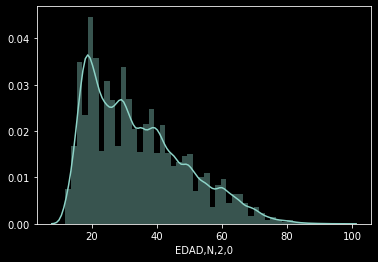

In [35]:
sns.distplot(dataframe_seleccion['EDAD,N,2,0'])

Text(0.5, 1.0, 'GRAFICA DE CAJA EDAD')

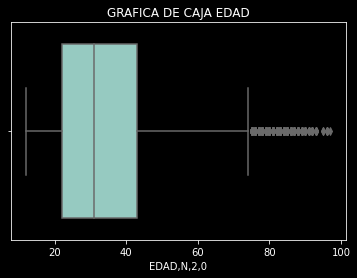

In [34]:
plt.style.use('dark_background')
sns.boxplot(x=dataframe_seleccion["EDAD,N,2,0"])
plt.title("GRAFICA DE CAJA EDAD")

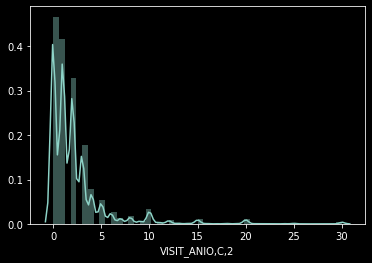

In [36]:
sns.distplot(dataframe_seleccion['VISIT_ANIO,C,2'])

Text(0.5, 1.0, 'GRÁFICA DE CAJA VISITAS AL AÑO')

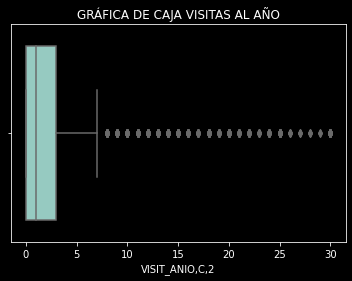

In [20]:
sns.boxplot(x=dataframe_seleccion["VISIT_ANIO,C,2"])
plt.title("GRÁFICA DE CAJA VISITAS AL AÑO")

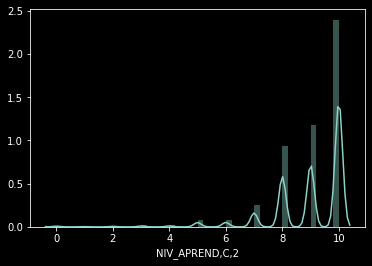

In [37]:
sns.distplot(dataframe_seleccion['NIV_APREND,C,2'])

Text(0.5, 1.0, 'GRÁFICA DE CAJA NIVEL DE APRENDIZAJE')

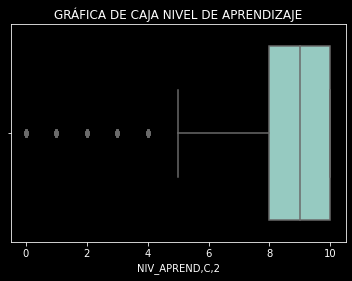

In [21]:
sns.boxplot(x=dataframe_seleccion["NIV_APREND,C,2"])
plt.title("GRÁFICA DE CAJA NIVEL DE APRENDIZAJE")

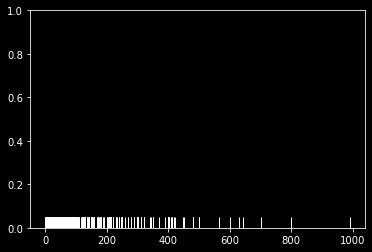

In [43]:
sns.rugplot(dataframe_seleccion['TAM_GRUPO,C,3'])

Text(0.5, 1.0, 'GRÁFICA DE CAJA TAMAÑO DE GRUPO')

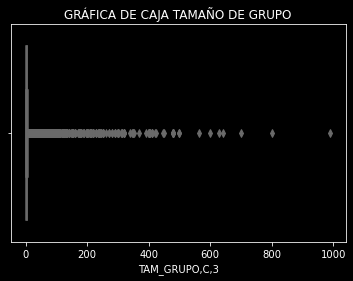

In [22]:
sns.boxplot(x=dataframe_seleccion["TAM_GRUPO,C,3"])
plt.title("GRÁFICA DE CAJA TAMAÑO DE GRUPO")

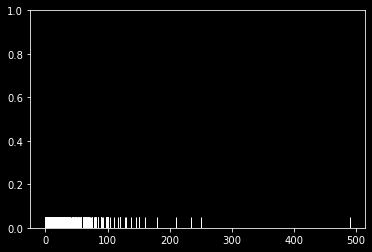

In [42]:
sns.rugplot(dataframe_seleccion['MENORES_12,C,3'])

Text(0.5, 1.0, 'GRÁFICA DE CAJA DE TAMAÑO DE GRUPO MENORES DE 12 AÑOS')

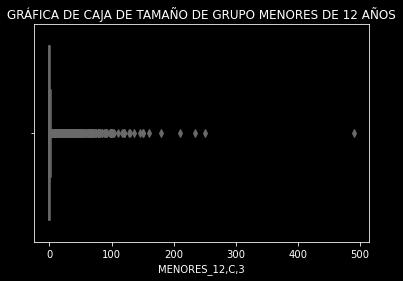

In [23]:
sns.boxplot(x=dataframe_seleccion["MENORES_12,C,3"])
plt.title("GRÁFICA DE CAJA DE TAMAÑO DE GRUPO MENORES DE 12 AÑOS")

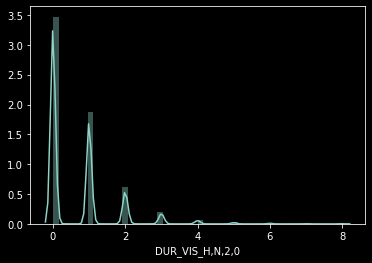

In [40]:
sns.distplot(dataframe_seleccion['DUR_VIS_H,N,2,0'])

Text(0.5, 1.0, 'GRÁFICA DE CAJA DURACION DE LA VISISTA EN HORAS')

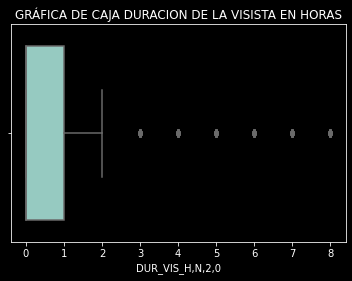

In [24]:
sns.boxplot(x=dataframe_seleccion["DUR_VIS_H,N,2,0"])
plt.title("GRÁFICA DE CAJA DURACION DE LA VISISTA EN HORAS")

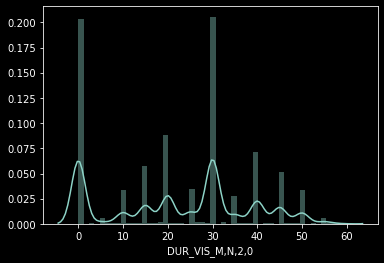

In [41]:
sns.distplot(dataframe_seleccion['DUR_VIS_M,N,2,0'])

Text(0.5, 1.0, 'GRÁFICA DE DURACION DE VISITA EN MINUTOS')

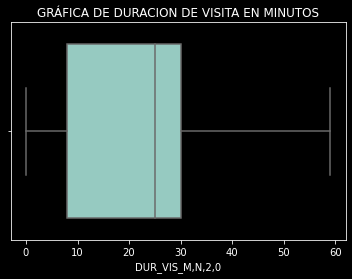

In [25]:
sns.boxplot(x=dataframe_seleccion["DUR_VIS_M,N,2,0"])
plt.title("GRÁFICA DE DURACION DE VISITA EN MINUTOS")

#### En los siguientes graficos se muestran las variable:

1. Sexo

2. Repetir Visita

3. Acompañado por pareja

4. Acompañado por familiar

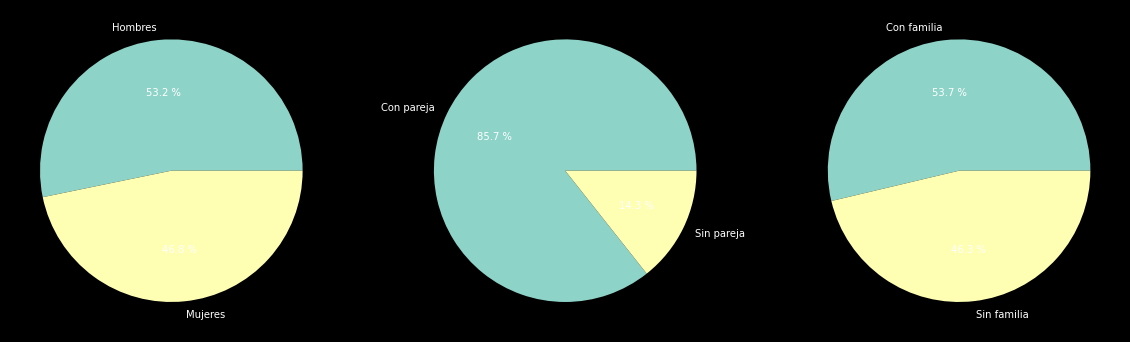

In [26]:
valores_sexo = dataframe_seleccion['SEXO,N,1,0'].value_counts()
sexo = ["Hombres","Mujeres"]
valores_repetir = dataframe_seleccion['REPETIR_VI,N,1,0'].value_counts()
repetir = ["Sí","No", "N.E"]
valores_asistencia_pareja = dataframe_seleccion['PAV_PAREJA,N,1,0'].value_counts()
acompa_nov = ["Con pareja","Sin pareja"]
valores_asistencia_familia = dataframe_seleccion['PAV_FAMILI,N,1,0'].value_counts()
acompa_fam = ["Con familia","Sin familia"]
plt.style.use('dark_background')
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.pie(valores_sexo, labels=sexo, autopct="%0.1f %%")
plt.subplot(1,3,2)
plt.pie(valores_asistencia_pareja, labels=acompa_nov, autopct="%0.1f %%")
plt.subplot(1,3,3)
plt.pie(valores_asistencia_familia, labels=acompa_fam, autopct="%0.1f %%")
plt.show()

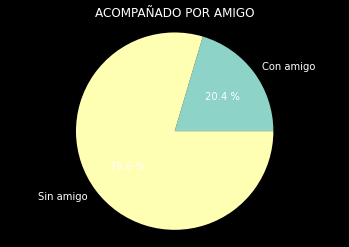

In [27]:
cantidad = [37977, 148148]
acompa_amigo = ["Con amigo","Sin amigo"]
plt.pie(cantidad, labels=acompa_amigo, autopct="%0.1f %%", )
plt.style.use('dark_background')
plt.title("ACOMPAÑADO POR AMIGO")
plt.axis("equal")
plt.show()

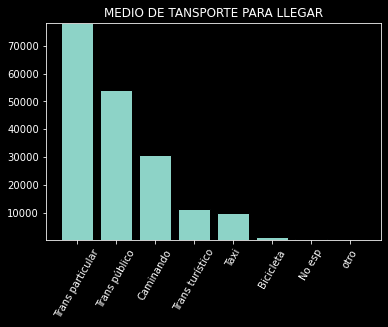

In [28]:
transporte = ["Trans particular","Trans público","Caminando", "Trans turístico", "Taxi", "Bicicleta", "No esp", "otro"]
cantidad = [78165, 54053, 30564, 11306, 9976, 1389, 650, 22]

plt.bar(range(8), cantidad, edgecolor = 'black')

plt.xticks(range(8), transporte, rotation=60)
plt.title("MEDIO DE TANSPORTE PARA LLEGAR")
plt.ylim(min(cantidad)-1, max(cantidad)+1)

plt.show()

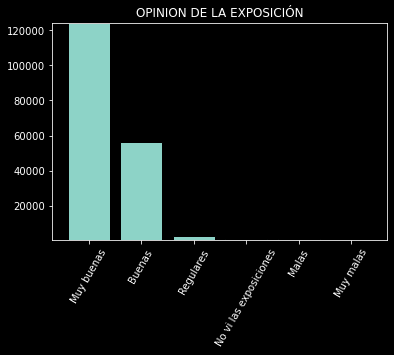

In [29]:
calidad = ["Muy buenas","Buenas","Regulares", "No vi las exposiciones", "Malas", "Muy malas"]
cantidad = [124228, 56224, 2862, 1245, 823, 306]

plt.bar(range(6), cantidad, edgecolor = 'black')

plt.xticks(range(6), calidad, rotation=60)
plt.title("OPINION DE LA EXPOSICIÓN")
plt.ylim(min(cantidad)-1, max(cantidad)+1)

plt.show()


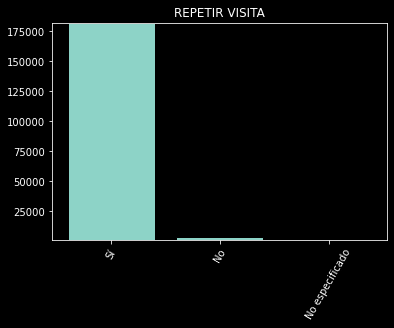

In [30]:
repetir = ["Sí","No","No especificado"]
cantidad = [182106, 3290, 729]

plt.bar(range(3), cantidad, edgecolor = 'black')

plt.xticks(range(3), repetir, rotation=60)
plt.title("REPETIR VISITA")
plt.ylim(min(cantidad)-1, max(cantidad)+1)

plt.show()

### Tratamiento de unos datos nominales 

In [ ]:
#Datos Genero
dataframe_seleccion.loc[dataframe_seleccion['SEXO,N,1,0'] == 1, 'SEXO,N,1,0'] = 'Hombre'
dataframe_seleccion.loc[dataframe_seleccion['SEXO,N,1,0'] == 2, 'SEXO,N,1,0'] = 'Mujer'
#Datos Escolaridad
dataframe_seleccion.loc[dataframe_seleccion['ESCOLARIDA,N,2,0'] == 1, 'ESCOLARIDA,N,2,0'] = 'Ninguna'
dataframe_seleccion.loc[dataframe_seleccion['ESCOLARIDA,N,2,0'] == 2, 'ESCOLARIDA,N,2,0'] = 'Preescolar'
dataframe_seleccion.loc[dataframe_seleccion['ESCOLARIDA,N,2,0'] == 3, 'ESCOLARIDA,N,2,0'] = 'Primaria'
dataframe_seleccion.loc[dataframe_seleccion['ESCOLARIDA,N,2,0'] == 4, 'ESCOLARIDA,N,2,0'] = 'Secundaria'
dataframe_seleccion.loc[dataframe_seleccion['ESCOLARIDA,N,2,0'] == 5, 'ESCOLARIDA,N,2,0'] = 'Estudios técnicos con secundaria terminada'
dataframe_seleccion.loc[dataframe_seleccion['ESCOLARIDA,N,2,0'] == 6, 'ESCOLARIDA,N,2,0'] = 'Normal básica'
dataframe_seleccion.loc[dataframe_seleccion['ESCOLARIDA,N,2,0'] == 7, 'ESCOLARIDA,N,2,0'] = 'Preparatoria o Bachillerato'
dataframe_seleccion.loc[dataframe_seleccion['ESCOLARIDA,N,2,0'] == 8, 'ESCOLARIDA,N,2,0'] = 'Estudios técnicos con preparatoria terminada'
dataframe_seleccion.loc[dataframe_seleccion['ESCOLARIDA,N,2,0'] == 9, 'ESCOLARIDA,N,2,0'] = 'Licenciatura'
dataframe_seleccion.loc[dataframe_seleccion['ESCOLARIDA,N,2,0'] == 10, 'ESCOLARIDA,N,2,0'] = 'Maestría o Doctorado'
dataframe_seleccion.loc[dataframe_seleccion['ESCOLARIDA,N,2,0'] == 99, 'ESCOLARIDA,N,2,0'] = 'No especifica'
#Datos Ocupacion
dataframe_seleccion.loc[dataframe_seleccion['OCUPACION,N,2,0'] == 1, 'OCUPACION,N,2,0'] = 'Funcionarios, directores y jefes'
dataframe_seleccion.loc[dataframe_seleccion['OCUPACION,N,2,0'] == 2, 'OCUPACION,N,2,0'] = 'Profesionistas y técnicos'
dataframe_seleccion.loc[dataframe_seleccion['OCUPACION,N,2,0'] == 3, 'OCUPACION,N,2,0'] = 'Trabajadores auxiliares en actividades administrativas'
dataframe_seleccion.loc[dataframe_seleccion['OCUPACION,N,2,0'] == 4, 'OCUPACION,N,2,0'] = 'Comerciantes, empleados en actividades administrativas'
dataframe_seleccion.loc[dataframe_seleccion['OCUPACION,N,2,0'] == 5, 'OCUPACION,N,2,0'] = 'Trabajadores en servicos personales y vigilancia'
dataframe_seleccion.loc[dataframe_seleccion['OCUPACION,N,2,0'] == 6, 'OCUPACION,N,2,0'] = 'Trabajadores en actividades agricolas, ganaderas, forestales, caza y pesca'
dataframe_seleccion.loc[dataframe_seleccion['OCUPACION,N,2,0'] == 7, 'OCUPACION,N,2,0'] = 'Trabajadores artesanales'
dataframe_seleccion.loc[dataframe_seleccion['OCUPACION,N,2,0'] == 8, 'OCUPACION,N,2,0'] = 'Operadores de maquinas industrial, ensambladores, choferes y conductores de transporte'
dataframe_seleccion.loc[dataframe_seleccion['OCUPACION,N,2,0'] == 9, 'OCUPACION,N,2,0'] = 'Trabajadores en actividades elementales y de apoyo'
dataframe_seleccion.loc[dataframe_seleccion['OCUPACION,N,2,0'] == 10, 'OCUPACION,N,2,0'] = 'Busca trabajo'
dataframe_seleccion.loc[dataframe_seleccion['OCUPACION,N,2,0'] == 11, 'OCUPACION,N,2,0'] = 'No trabaja'
dataframe_seleccion.loc[dataframe_seleccion['OCUPACION,N,2,0'] == 11, 'OCUPACION,N,2,0'] = 'Insuficientemente especificada'
dataframe_seleccion.loc[dataframe_seleccion['OCUPACION,N,2,0'] == 11, 'OCUPACION,N,2,0'] = 'No especifica'